The perceptron is a single layer neural network with simple structure
We could combine multiple perceptron togethor to constitute a more complex neural network architecture

Activation functions:
Sigmoid function:
$$\text{sigmoid}(x) = \frac{1}{1 + e^{-x}}$$
The value is in (0,1)

Tanh function:
$$\text{tanh}(x)\frac{1 - e^{-2x}}{1 + e^{-2x}}$$
Similiar to sigmoid but value is in (-1,1)

ReLU functiom:
 Rectified Linear Unit
 $$\text{ReLu}(x) = max(0,x)$$

Process for Back propagation:

1. Calculate the actual output though Forward Propagation:
The weighted sum of each node is given by
$$
    a_j = \sum{}{}(w_{ij}*x_i)
$$
where:
$w_{i,j}$ is the weights assoicated with the $j^{th}$ input to the $i^{th}$ neuron ,
$x_i$ is the value of the $j^{th}$ input,


Then we pass the result to the activation function to get the output, which is the value of the node

After calculate the final actual output, we compare it with our expected output to get the error value, which is $$\delta = z - y$$ 

Where z is the expected output y is the actual output

To update the weight of a nerual network, simiilar to perceptron   
$$
     W \leftarrow W + \lambda y_i x_i
$$
$$
     b \leftarrow b + \lambda y_i
$$
 we use 
$
    W \leftarrow W + \bigtriangleup w_{ij}
$
where 
$$
 \bigtriangleup w_{ii} = \eta \times \delta_i \times O_i
$$

To calculate the $\delta_i$,
We have 
$$\delta_i = \sum{}{}w_{ij}\delta_j$$


Where j is the previous node(from back)

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

To implement ANN, we set the input as X, first layer weight be $ W_1 $the second layer $ W_2 $

suppose $$ X =  [x_1 x_2] $$
$$
W_1 = 
\begin{bmatrix}
W_{11} & W_{12} & W_{13} \\
W_{14} & W_{15} & W_{16} \\
\end{bmatrix}
$$
$$
W_2 = 
\begin{bmatrix}
W_{21} \\
W_{22} \\
W_{23}

\end{bmatrix}
$$

Let Z be the output of the neuron
$$Z = sigmoid(X \cdot W_1)$$
Y be the input layer
$$Y = sigmoid(Z \cdot w_2)$$

In [14]:
import numpy as np
X = np.array([[1,1]])
Y = np.array([[1]])

W1 = np.random.rand(2,3)
W2 = np.random.rand(3,1)

In [15]:
inputlayer = X
hiddenlayer = sigmoid(np.dot(inputlayer, W1))
outputlayer = sigmoid(np.dot(hiddenlayer, W2))

outputlayer

array([[0.77499059]])

Define the input value of neural network be Y, actual value is v
The loss function is $$Loss(y,Y) = \sum{}{}(y-Y)^2$$

Then find the gradient $ \frac{\partial Loss(y,Y)}{\partial W_1} $ and $ \frac{\partial Loss(y,Y)}{\partial W_2} $

$$
\frac{\partial Loss(y,Y)}{\partial W_2} = 
2(Y-y) * \bigtriangleup sigmoid(Z \cdot W_2) \cdot Z
$$
$$
\frac{\partial Loss(y,Y)}{\partial W_2} = 
2(Y-y) * \bigtriangleup sigmoid(Z \cdot W_2) \cdot W_2 * \bigtriangleup sigmoid(X \cdot W_1) \cot X
$$

In [16]:
dev_W2 = np.dot(
    hiddenlayer.T,
    (2*(Y - outputlayer) * dev_sigmoid(np.dot(hiddenlayer, W2)))
)
dev_W1 = np.dot(
    inputlayer.T,
    (np.dot(2*(Y - outputlayer) * dev_sigmoid(np.dot(hiddenlayer, W2)), W2.T) * dev_sigmoid(np.dot(inputlayer, W1)))
)
dev_W2,dev_W1

(array([[0.05779379],
        [0.06521022],
        [0.04797219]]),
 array([[0.01197109, 0.0074749 , 0.00287664],
        [0.01197109, 0.0074749 , 0.00287664]]))

In [17]:
W1 -= 0.1 * dev_W1
W2 -= 0.1 * dev_W2

W2,W1

(array([[0.78021228],
        [0.67164911],
        [0.14947672]]),
 array([[0.70334752, 0.63615304, 0.18713647],
        [0.32194501, 0.95490436, 0.26511163]]))

In [27]:
#Rewrite all the code above as a Class
class ANN:
    
    def __init__(self,X,y,lrate):
        self.inputlayer = X
        self.W1 = np.random.rand(self.inputlayer.shape[1],3)
        self.W2 = np.random.rand(3,1)
        self.y = y
        self.lrate = lrate
        self.outputlayer = np.zeros(self.y.shape)
        
    def forward_prop(self):
        self.hiddenlayer = sigmoid(np.dot(self.inputlayer, self.W1))
        self.outputlayer = sigmoid(np.dot(self.hiddenlayer, self.W2))
        
    def backward_prop(self):
        dev_W2 = np.dot(
            self.hiddenlayer.T,
            (2*(self.outputlayer -self.y ) * dev_sigmoid(np.dot(self.hiddenlayer, self.W2)))
        )
        dev_W1 = np.dot(
            self.inputlayer.T,
            (np.dot(2*(self.outputlayer - self.y) * dev_sigmoid(np.dot(self.hiddenlayer, self.W2)), self.W2.T) * dev_sigmoid(np.dot(self.inputlayer, self.W1)))
        )
        self.W1 -= self.lrate * dev_W1
        self.W2 -= self.lrate * dev_W2
        

The final loss is  [np.float64(155.18195596747302), np.float64(140.93980087273806), np.float64(134.9853029871627), np.float64(133.75841570062494), np.float64(133.49345326331226), np.float64(133.4249384783333), np.float64(133.40484348396012), np.float64(133.39813887862994), np.float64(133.39538694707866), np.float64(133.39385227609017), np.float64(133.39270868349683), np.float64(133.39170037358696), np.float64(133.3907466013846), np.float64(133.3898211786481), np.float64(133.38891508294316), np.float64(133.38802473574032), np.float64(133.38714830535906), np.float64(133.38628453569237), np.float64(133.38543237289966), np.float64(133.38459084474292), np.float64(133.38375902003244), np.float64(133.38293599352335), np.float64(133.3821208789298), np.float64(133.3813128045527), np.float64(133.38051090976307), np.float64(133.3797143417716), np.float64(133.37892225248774), np.float64(133.37813379539298), np.float64(133.37734812238648), np.float64(133.3765643805741), np.float64(133.3757817089736

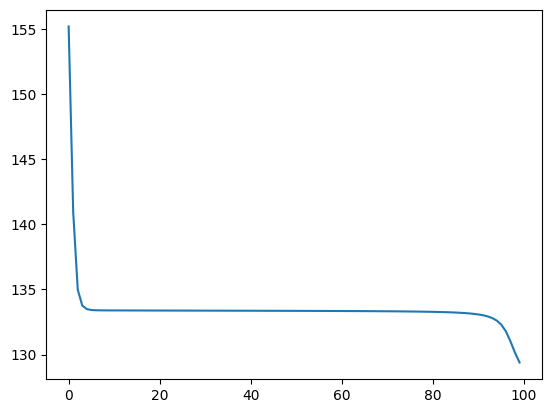

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')
X = df[["X0","X1"]].values
y = df[["Y"]].values

model = ANN(X,y,0.01)
loss = []

for i in range(100):
    model.forward_prop()
    model.backward_prop()
    loss.append(np.sum((y - model.outputlayer)**2))
print("The final loss is ",loss)
plt.plot(loss)
